# YOUR PROJECT TITLE

Imports and set magics:

In [2]:
import numpy as np
from scipy import optimize
from scipy import linalg
from scipy import interpolate 
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Model description and consumer maximization problem 

We consider the 2 good world x1 and x2 with **Cobb-Douglas utility function** where:

**utility** is given by u(c).

$$ u(x_1,x_2) = 
   {Ax_1^{\beta}}x_2^{1- \beta}
$$

the customer is trying to solve utility maximization problem with **budet constraint**

$$ p_1x_1 + p_2x_2 = I $$

## Consumer Maximization

And we define all **symbols**:

In [4]:
A = sm.symbols('A')
beta = sm.symbols('beta')
x1 = sm.symbols('x_1')
x2 = sm.symbols('x_2')
p1 = sm.symbols('p_1')
p2 = sm.symbols('p_2')
I = sm.symbols('I')
U = sm.symbols('U')


# we have budget constraint bc which 
bc = sm.Eq(p1*x1 + p2*x2, I)

define objective function

In [5]:
utility = A*x1**beta * x2**(1-beta)

define budget constraint 

In [6]:
bc = sm.Eq(p1*x1 + p2*x2, I)

isolate x2 from budget constraint 

In [7]:
x2_c = sm.solve(bc, x2)
x2_c[0]

(I - p_1*x_1)/p_2

substitute x2 into objective function 

In [8]:
utility_subs = utility.subs(x2,x2_c[0])
utility_subs

A*x_1**beta*((I - p_1*x_1)/p_2)**(1 - beta)

take the derivative 

In [9]:
foc = sm.diff(utility_subs, x1)
foc

A*beta*x_1**beta*((I - p_1*x_1)/p_2)**(1 - beta)/x_1 - A*p_1*x_1**beta*((I - p_1*x_1)/p_2)**(1 - beta)*(1 - beta)/(I - p_1*x_1)

solve for FOC

In [10]:
x1_sol = sm.solve(sm.Eq(foc,0),x1)
x1_sol[0]

I*beta/p_1

apply the same procedure to obtain the result of x2

In [11]:
x1_c = sm.solve(bc, x1)
utility_subs_0 = utility.subs(x1,x1_c[0])
foc_0 = sm.diff(utility_subs_0, x2)
x2_sol = sm.solve(sm.Eq(foc_0,0),x2)
x2_sol[0]

-I*(beta - 1)/p_2

## Analytical Solution

Giving the value of p1=1,p2=2,I=10,beta = 0.4 and A=2

In [54]:
def x1_func(p1,p2,I,beta,A):
    return I*beta/p1
def x2_func(p1,p2,I,beta,A):
    return I*(1-beta)/p2

In [55]:
print('x1=',x1_func(1,2,10,0.4,2))
print('x2=',x2_func(1,2,10,0.4,2))

x1= 4.0
x2= 3.0


## Numerical solution

Define the **parameters** of p1, p2 and I:

In [56]:
p1 = 1
p2 = 2
I = 10
A = 2
beta = 0.4

**Solve numerically** for given values of p1,p2 and I:

In [57]:
def utility_0(x1,x2,A,beta):
    return A*x1**beta* x2 **(1-beta)

In [58]:
def func_0(x1,x2,p1,p2,I):
    x2 = I*(1-beta)/p1
    return -utility_0(x1,x2,A,beta)

In [59]:
# call minimizer to solve the problem
sol_n = optimize.minimize_scalar(func_0, method='bounded',bounds=(0,I/p2),args=(p1,p2,I,beta))

x1 = sol_n.x
x2 = (I-p1*x1)/p2
func_0 = utility_0(x1,x2,A,beta)

In [60]:
print(f'x1={x1}')
print(f'x2={x2}')
print(f'utility = {func_0}')
print(f'I-p1*x1-p2*x2 = {I-p1*x1-p2*x2:.2f}')

x1=4.999996371653228
x2=2.500001814173386
utility = 6.597540511389258
I-p1*x1-p2*x2 = 0.00


# Visualization and Further Analysis 

In [62]:
#Utility function:
def u(x_1,x_2,A,beta):    
    u= (A*x_1**(beta))*x_2**(1-beta)
    return u

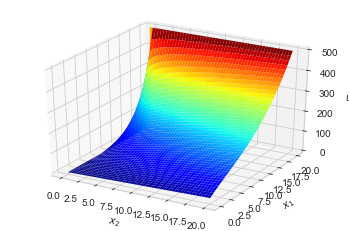

In [64]:
#Vectors:
x1_vec = np.linspace(0, 20, 50)
x2_vec = np.linspace(0, 20, 50)
A_vec = np.linspace (1, 25, 50)
Beta_vec = np.linspace (0, 1,50)

#Grid:
x1_grid, x2_grid = np.meshgrid(x1_vec, x2_vec) 

#Utility function in grid:
u_grid = u(x1_grid, x2_grid, A_vec, Beta_vec)

#Plot:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(x2_grid, x1_grid, u_grid, cmap=plt.cm.jet, cstride=1, rstride=1)

#Labels:
ax.set_xlabel('$x_2$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$u$')
ax.invert_xaxis()

# Conclusion

ADD CONCISE CONCLUSION.